In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
# import the csv file
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [ ]:
df.shape

(65276, 25)

In [ ]:
# check out content in the dataframe
df.head(20)


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
# checking for null value numebr and data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
# hence we interesting in the overall pattern, information such as eventID, ArrestID can be droped
df. drop(df.columns[[2,3,4,-1]],axis =1, inplace = True)
df.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,...,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
0,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,...,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
1,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,2020,Oct-Dec,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,2021,Jan-Mar,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,2021,Jan-Mar,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


### Treating data type


In [ ]:
# we found some column can be converted to type that are easier to be handled
df["Sex"].unique()
df["Youth_at_arrest__under_18_years"].unique()
df["StripSearch"].unique()
df["ItemsFound"].unique()
df["ArrestLocDiv"].unique()

array(['54', 'XX', '42', '52', '14', '51', '53', '31', '11', '12', '13',
       '41', '22', '55', '43', '23', '33', '32'], dtype=object)

In [ ]:
# categorize "Youth_at_arrest__under_18_years" colume by 1 for under 17, 0 for not under 
df["Youth_at_arrest__under_18_years"].replace(['Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'],1, inplace = True)
df["Youth_at_arrest__under_18_years"].replace('Not a youth',0, inplace = True)

### Treating NULL

In [ ]:
df.isnull().sum()


Arrest_Year                            0
Arrest_Month                           0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
dtype: int64

In [ ]:
# checking for variable names
df["Perceived_Race"].unique()
df["Occurrence_Category"].unique()
#df["Age_group__at_arrest_"].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide', nan],
      dtype=object)

In [ ]:
# replace all null value with unknown in race and age group column
df["Perceived_Race"].replace([np.nan],"Unknown or Legacy", inplace = True)
df["Age_group__at_arrest_"].replace([np.nan],"Unknown", inplace = True)
df["Occurrence_Category"].replace([np.nan],"Unknown", inplace = True)

# replace all null value with 0 for all search reason
df.replace([np.nan],0, inplace = True)

In [ ]:
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
dtype: int64

In [ ]:
list(df.columns)


['Arrest_Year',
 'Arrest_Month',
 'Perceived_Race',
 'Sex',
 'Age_group__at_arrest_',
 'Youth_at_arrest__under_18_years',
 'ArrestLocDiv',
 'StripSearch',
 'Booked',
 'Occurrence_Category',
 'Actions_at_arrest___Concealed_i',
 'Actions_at_arrest___Combative__',
 'Actions_at_arrest___Resisted__d',
 'Actions_at_arrest___Mental_inst',
 'Actions_at_arrest___Assaulted_o',
 'Actions_at_arrest___Cooperative',
 'SearchReason_CauseInjury',
 'SearchReason_AssistEscape',
 'SearchReason_PossessWeapons',
 'SearchReason_PossessEvidence',
 'ItemsFound']

In [ ]:
# according to the website there cases where search happened but is not recorded by booked
for index, row in df.iterrows():
  if row['StripSearch'] == 1:
    row['Booked'] = 1
  

In [ ]:
df_without_XX = df[df['ArrestLocDiv'] != "XX"]
df_strip_wXX = df_without_XX[df_without_XX['StripSearch'] == 1]

Text(0.5, 0.98, 'Case count for different sex in divisions')

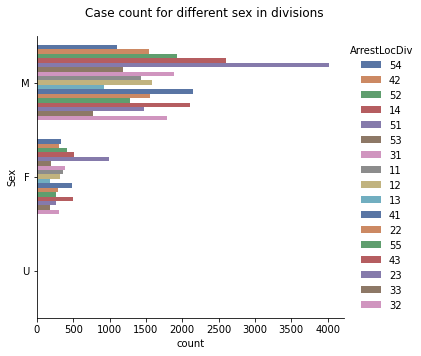

In [ ]:
# catplot for distribution of ArrestLoc categorized by sex


sa = sns.catplot(y="Sex", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX, )


sa.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
sa.fig.suptitle('Case count for different sex in divisions')


Text(0.5, 0.98, 'Distribution of case count in divisons categorized by whether a strip search occurred')

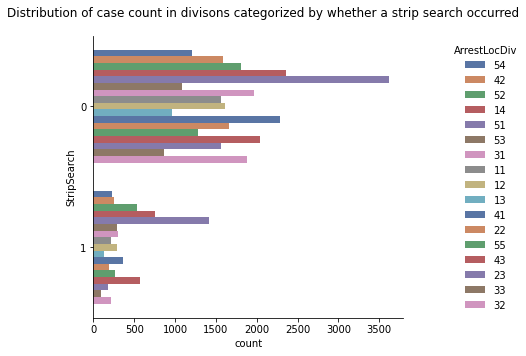

In [ ]:
# catplot for distribution of ArrestLoc categorized by strip search
StA = sns.catplot(y="StripSearch", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX)

StA.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StA.fig.suptitle('Distribution of case count in divisons categorized by whether a strip search occurred')

Text(0.5, 0.98, 'Distribution of case count between races categorized by whether a strip search occurred')

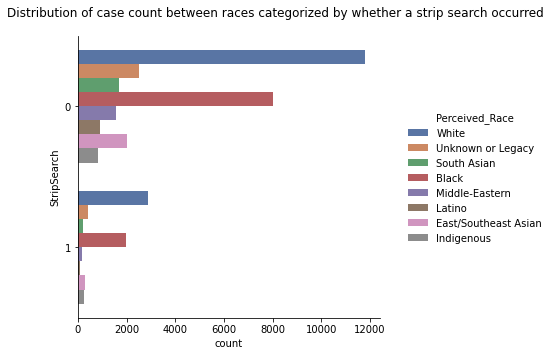

In [ ]:
# catplot for distribution of Perceived_Race categorized by StripSearch
StR = sns.catplot(y="StripSearch", hue="Perceived_Race", kind="count",
            palette="deep",
            data=df_without_XX)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count between races categorized by whether a strip search occurred')

In [ ]:
total_rows = len(df_without_XX[df_without_XX['StripSearch'] == 1])

# Filter the rows where StripSearch is 1 and Race is either White or Black
filtered_df = df_without_XX[(df_without_XX['StripSearch'] == 1) & (df_without_XX['Perceived_Race'] == 'Black')]

# Calculate the number of rows that meet the above condition
selected_rows = len(filtered_df)

# Calculate the proportion
proportion = selected_rows / total_rows

# Print the proportion
print(proportion)

0.3144264378773435


Text(0.5, 0.98, 'Distribution of case count between divisons categorized by whether underaged')

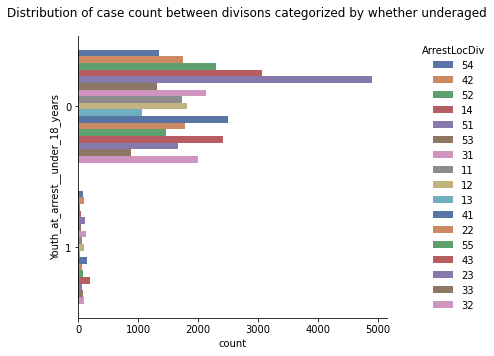

In [ ]:
# catplot for distribution of StripSearch categorized by Youth_at_arrest__under_18_years
ya = sns.catplot(y="Youth_at_arrest__under_18_years", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX)
ya.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ya.fig.suptitle('Distribution of case count between divisons categorized by whether underaged')

Text(0.5, 0.98, 'Distribution of case count by wheter a search conducted between two years')

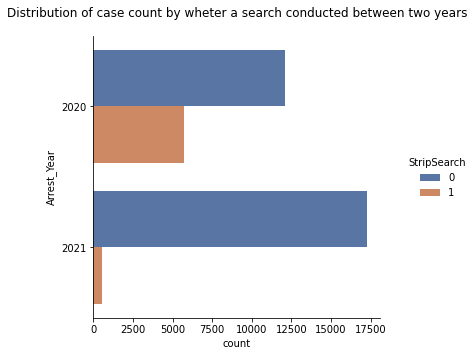

In [ ]:
# catplot for distribution of StripSearch categorized by Youth_at_arrest__under_18_years
ASt = sns.catplot(y="Arrest_Year", hue="StripSearch", kind="count",
            palette="deep",
            data=df_without_XX)
ASt.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ASt.fig.suptitle('Distribution of case count by wheter a search conducted between two years')

It seems like change year does affect the number for strip search, and the number also affect by the division.


In [ ]:
# Further divide the data into category by measure like sex and year
df_male = df_strip_wXX[df_strip_wXX['Sex'] == 'M']
df_female = df_strip_wXX[df_strip_wXX['Sex'] == 'F']

df_male_20 = df_male[df_male['Arrest_Year'] == 2020]
df_male_21 = df_male[df_male['Arrest_Year'] == 2021]
df_female_20 = df_female[df_female['Arrest_Year'] == 2020]
df_female_21 = df_female[df_female['Arrest_Year'] == 2021]

In [ ]:
df_male_20_loc = df_male_20.groupby('ArrestLocDiv')
df_male_21_loc = df_male_21.groupby('ArrestLocDiv')
df_female_20_loc = df_female_20.groupby('ArrestLocDiv')
df_female_21_loc = df_female_21.groupby('ArrestLocDiv')
df_male_20_loc.head(10)

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,...,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
14,2020,Apr-June,Black,M,Aged 25 to 34 years,0,53,1,1,Mischief & Fraud,...,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0
69,2020,Jan-Mar,South Asian,M,Aged 45 to 54 years,0,51,1,1,Break & Enter,...,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0
73,2020,Jan-Mar,White,M,Aged 25 to 34 years,0,54,1,1,Weapons & Homicide,...,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0
84,2020,Jan-Mar,Black,M,Aged 18 to 24 years,0,53,1,1,Assault & Other crimes against persons,...,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
85,2020,Apr-June,Black,M,Aged 18 to 24 years,0,51,1,1,Other Offence,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2020,Jan-Mar,Black,M,Aged 35 to 44 years,0,23,1,1,"FTA/FTC, Compliance Check & Parollee",...,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
6675,2020,Oct-Dec,South Asian,M,Aged 45 to 54 years,0,13,1,1,Harassment & Threatening,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
6881,2020,July-Sept,White,M,Aged 25 to 34 years,0,13,1,1,Assault & Other crimes against persons,...,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
7396,2020,July-Sept,Black,M,Aged 35 to 44 years,0,13,1,1,Drug Related,...,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0


In [ ]:
# for 2020 and 2021 exmain the stripseach number for all divions by Male and Female
df_male_20_num = pd.DataFrame({'StripNum_20_M': df_male_20_loc['StripSearch'].count()})
df_male_21_num = pd.DataFrame({'StripNum_21_M': df_male_21_loc['StripSearch'].count()})
df_female_20_num = pd.DataFrame({'StripNum_20_F': df_female_20_loc['StripSearch'].count()})
df_female_21_num = pd.DataFrame({'StripNum_21_F': df_female_21_loc['StripSearch'].count()})


merged_df_num = pd.merge(pd.merge(df_male_20_num, df_male_21_num, on='ArrestLocDiv', how='outer'),
                        pd.merge(df_female_20_num, df_female_21_num, on='ArrestLocDiv', how='outer'),
                        on='ArrestLocDiv', how='outer').reset_index()


merged_df_num.head(20)
#print(merged_df_num.columns)

,ArrestLocDiv,StripNum_20_M,StripNum_21_M,StripNum_20_F,StripNum_21_F
0,11,167,13,38,4.0
1,12,240,5,38,2.0
2,13,115,6,13,NaN
3,14,523,108,103,23.0
4,22,162,4,21,3.0
5,23,118,31,24,4.0
6,31,249,11,39,1.0
7,32,177,10,25,NaN
8,33,69,9,11,1.0
9,41,274,14,69,3.0


In [ ]:
merged_df_num.describe()

,StripNum_20_M,StripNum_21_M,StripNum_20_F,StripNum_21_F
count,17.000000,17.000000,17.000000,15.000000
mean,282.764706,27.117647,55.352941,5.666667
std,231.272710,33.421330,55.128193,6.521028
min,69.000000,4.000000,11.000000,1.000000
25%,167.000000,6.000000,25.000000,2.000000
50%,220.000000,11.000000,38.000000,3.000000
75%,274.000000,31.000000,69.000000,6.000000
max,1049.000000,108.000000,241.000000,23.000000


Text(0.5, 0.98, 'Density distribution of search number between years and sex')

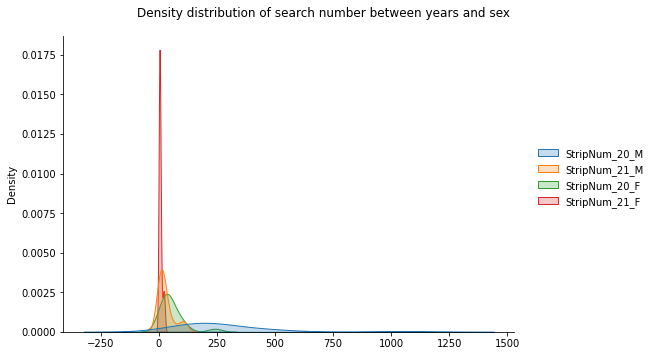

In [ ]:
#fig, ax = plt.subplots(nrows = 2, ncols = 2)

den = sns.displot(data=merged_df_num, kind='kde', fill=True, height=5, aspect=1.5)
den.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
den.fig.suptitle('Density distribution of search number between years and sex')

In [ ]:
melt_df_num = pd.melt(merged_df_num, id_vars=['ArrestLocDiv'], var_name='StripType', value_name='StripNum')
melt_df_num.head(20)

,ArrestLocDiv,StripType,StripNum
0,11,StripNum_20_M,167.0
1,12,StripNum_20_M,240.0
2,13,StripNum_20_M,115.0
3,14,StripNum_20_M,523.0
4,22,StripNum_20_M,162.0
5,23,StripNum_20_M,118.0
6,31,StripNum_20_M,249.0
7,32,StripNum_20_M,177.0
8,33,StripNum_20_M,69.0
9,41,StripNum_20_M,274.0


In [ ]:
# examine correlation for strip number and division
melt_df_num.ArrestLocDiv = melt_df_num.ArrestLocDiv.astype('int64')
correlate = melt_df_num['StripNum'].corr(melt_df_num['ArrestLocDiv'])
print(correlate)

0.12200167708476663


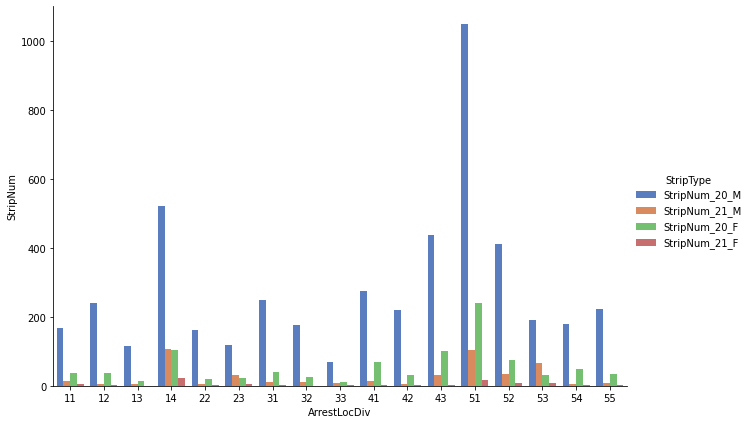

In [ ]:
sns.catplot(x='ArrestLocDiv', y='StripNum', hue='StripType', data=melt_df_num, kind='bar', height=6, aspect=1.5, palette='muted')

### lets take a closer look on it and spread out the specific reason for search

In [ ]:
df_51 = df_without_XX[df_without_XX['ArrestLocDiv'] == '51']

df_striped_A = df_strip_wXX[df_strip_wXX['SearchReason_CauseInjury'] == 1]
df_striped_grouped_A = df_striped_A.groupby('ArrestLocDiv')
df_search_A = pd.DataFrame({'CauseInjury': df_striped_grouped_A['SearchReason_CauseInjury'].count()})

df_striped_B = df_strip_wXX[df_strip_wXX['SearchReason_AssistEscape'] == 1]
df_striped_grouped_B = df_striped_B.groupby('ArrestLocDiv')
df_search_B = pd.DataFrame({'AssistEscape': df_striped_grouped_B['SearchReason_AssistEscape'].count()})

df_striped_C = df_strip_wXX[df_strip_wXX['SearchReason_PossessWeapons'] == 1]
df_striped_grouped_C = df_striped_C.groupby('ArrestLocDiv')
df_search_C = pd.DataFrame({'PossessWeapons': df_striped_grouped_C['SearchReason_PossessWeapons'].count()})

df_striped_D = df_strip_wXX[df_strip_wXX['SearchReason_PossessEvidence'] == 1]
df_striped_grouped_D = df_striped_D.groupby('ArrestLocDiv')
df_search_D = pd.DataFrame({'PossessEvidence': df_striped_grouped_D['SearchReason_PossessEvidence'].count()})

merged_df_striped = pd.merge(pd.merge(df_search_A, df_search_B, on='ArrestLocDiv', how='outer'),
                        pd.merge(df_search_C, df_search_D, on='ArrestLocDiv', how='outer'),
                        on='ArrestLocDiv', how='outer').reset_index()


merged_df_striped.head(20)

#print(df_without_XX['SearchReason_PossessWeapons'].count())

,ArrestLocDiv,CauseInjury,AssistEscape,PossessWeapons,PossessEvidence
0,11,180,121,128,149
1,12,219,108,136,121
2,13,99,43,61,59
3,14,579,188,335,325
4,22,144,107,100,126
5,23,127,49,73,94
6,31,233,107,168,105
7,32,162,79,104,85
8,33,69,32,49,37
9,41,298,176,171,194


In [ ]:
merged_df_striped.describe()

,CauseInjury,AssistEscape,PossessWeapons,PossessEvidence
count,17.000000,17.000000,17.000000,17.000000
mean,282.470588,124.588235,166.352941,154.823529
std,213.004729,77.728742,99.602925,118.830886
min,69.000000,32.000000,49.000000,37.000000
25%,162.000000,79.000000,104.000000,94.000000
50%,219.000000,110.000000,145.000000,121.000000
75%,298.000000,150.000000,171.000000,171.000000
max,920.000000,373.000000,420.000000,539.000000


In [ ]:
melt_df_striped = pd.melt(merged_df_striped, id_vars=['ArrestLocDiv'], var_name='StripType', value_name='StripNum')
melt_df_striped.head()


,ArrestLocDiv,StripType,StripNum
0,11,CauseInjury,180
1,12,CauseInjury,219
2,13,CauseInjury,99
3,14,CauseInjury,579
4,22,CauseInjury,144


Text(0.5, 0.98, 'Search number distribution by specific search reason across all divisons')

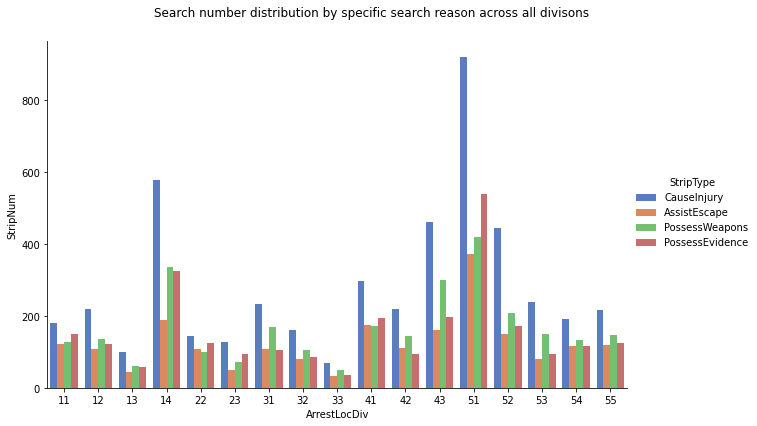

In [ ]:
cat = sns.catplot(x='ArrestLocDiv', y='StripNum', hue='StripType', data=melt_df_striped, kind='bar', height=6, aspect=1.5, palette='muted')
cat.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cat.fig.suptitle('Search number distribution by specific search reason across all divisons')

Text(0.5, 0.98, 'box plot for each search type')

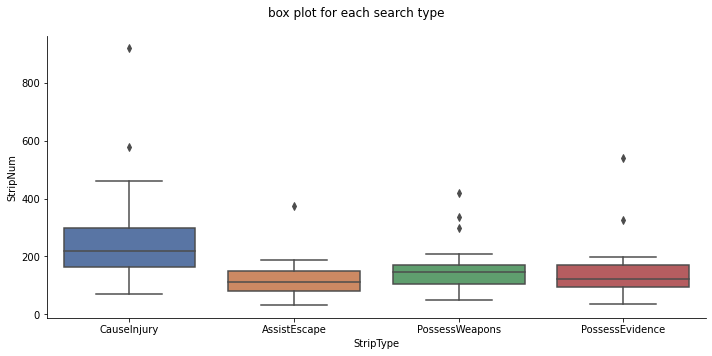

In [ ]:
box = sns.catplot(data=melt_df_striped, kind="box", x="StripType", y="StripNum", 
            palette="deep",height=5, aspect=2)
box.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
box.fig.suptitle('box plot for each search type')

# Question 1: Does divisons affect the number of stripseasrch conduncted and would sex or change in year vary the result with the Toronto Divisons.

In [ ]:
# add two summed columns for analzing relation between year and strip number

col_20 = ['StripNum_20_M', 'StripNum_20_F']
col_21 = ['StripNum_21_M', 'StripNum_21_F']
merged_df_num['StripNum_20'] = merged_df_num[col_20].sum(1)
merged_df_num['StripNum_21'] = merged_df_num[col_21].sum(1)

merged_df_num.head(20)

,ArrestLocDiv,StripNum_20_M,StripNum_21_M,StripNum_20_F,StripNum_21_F,StripNum_20,StripNum_21
0,11,167,13,38,4.0,205,17.0
1,12,240,5,38,2.0,278,7.0
2,13,115,6,13,NaN,128,6.0
3,14,523,108,103,23.0,626,131.0
4,22,162,4,21,3.0,183,7.0
5,23,118,31,24,4.0,142,35.0
6,31,249,11,39,1.0,288,12.0
7,32,177,10,25,NaN,202,10.0
8,33,69,9,11,1.0,80,10.0
9,41,274,14,69,3.0,343,17.0


# T test:

First hypothesis for question 1 

H0: The number of people being searched is identical between year 2020 and 2021.

H1: There are difference between the number of people being searched for 2020 and 2021

In [ ]:
print('Ttest results for stripnumebr:',stats.ttest_ind(merged_df_num['StripNum_20'], merged_df_num['StripNum_21'], equal_var=False))


Ttest results for stripnumebr: Ttest_indResult(statistic=4.373369045542924, pvalue=0.00043542798665706833)


In [ ]:

#calculate mean and standard deviation of groups 
#those with less than 3 in family show higher mean average score 
print('Mean number for people get searched for 2020',merged_df_num['StripNum_20'].mean(), 'for and 2021:', merged_df_num['StripNum_21'].mean())
print('Standard deviation for people get searched for 2020:',merged_df_num['StripNum_20'].std(),'for and 2021:', merged_df_num['StripNum_21'].std())

Mean number for people get searched for 2020 338.11764705882354 for and 2021: 32.11764705882353
Standard deviation for people get searched for 2020: 285.7662686429552 for and 2021: 39.54409303698401


In [ ]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)

def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(merged_df_num['StripNum_20']), sms.DescrStatsW(merged_df_num['StripNum_21']))
print('Confidence interval for sex:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for sex: (158.11572323174283, 453.88427676825717)


In [ ]:
#welch dof 
print('DOF for search number:',welch_dof(merged_df_num['StripNum_20'], merged_df_num['StripNum_21']))

DOF for search number: 16.612536640587113


Second hypothesis for question 1 

H0: The number of people being searched is identical between male and female.

H1: There are difference between the number of people being searched for male and female

In [ ]:
col_M = ['StripNum_20_M', 'StripNum_21_M']
col_F = ['StripNum_20_F', 'StripNum_21_F']
merged_df_num['StripNum_M'] = merged_df_num[col_M].sum(1)
merged_df_num['StripNum_F'] = merged_df_num[col_F].sum(1)
merged_df_num.head(20)

,ArrestLocDiv,StripNum_20_M,StripNum_21_M,StripNum_20_F,StripNum_21_F,StripNum_20,StripNum_21,StripNum_M,StripNum_F
0,11,167,13,38,4.0,205,17.0,180,42.0
1,12,240,5,38,2.0,278,7.0,245,40.0
2,13,115,6,13,NaN,128,6.0,121,13.0
3,14,523,108,103,23.0,626,131.0,631,126.0
4,22,162,4,21,3.0,183,7.0,166,24.0
5,23,118,31,24,4.0,142,35.0,149,28.0
6,31,249,11,39,1.0,288,12.0,260,40.0
7,32,177,10,25,NaN,202,10.0,187,25.0
8,33,69,9,11,1.0,80,10.0,78,12.0
9,41,274,14,69,3.0,343,17.0,288,72.0


In [ ]:
print('Ttest results for stripnumebr:',stats.ttest_ind(merged_df_num['StripNum_M'], merged_df_num['StripNum_F'], equal_var=False))

Ttest results for stripnumebr: Ttest_indResult(statistic=3.8871400695408793, pvalue=0.0011070810709750483)


In [ ]:
#calculate mean and standard deviation of groups 
#those with less than 3 in family show higher mean average score 
print('Mean number for people get searched for male',merged_df_num['StripNum_M'].mean(), 'for and female:', merged_df_num['StripNum_F'].mean())
print('Standard deviation for people get searched for male:',merged_df_num['StripNum_M'].std(),'for and female:', merged_df_num['StripNum_F'].std())

Mean number for people get searched for male 309.88235294117646 for and female: 60.35294117647059
Standard deviation for people get searched for male: 257.80755476540565 for and female: 59.909245088373666


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(merged_df_num['StripNum_M']), sms.DescrStatsW(merged_df_num['StripNum_F']))
print('Confidence interval for sex:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for sex: (114.51246077177674, 384.54636275763505)


In [ ]:
#welch dof 
print('DOF for search number:',welch_dof(merged_df_num['StripNum_M'], merged_df_num['StripNum_F']))

DOF for search number: 17.72298627435671


# One-way ANOVA for the Second hypothesis:

H0: The means for people being searched are identical for all divisons.

H1: The means for people being searched are different for all divisons.

In [ ]:
# grouping the strip search number by division
df_div_anova = melt_df_striped.drop('StripType', axis=1)
df_div_anova = df_div_anova.groupby('ArrestLocDiv')


divisions = []
n_strip_searched = []
for name, group in df_div_anova:
    divisions.append(name)
    n_strip_searched.append(group['StripNum'].values)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*n_strip_searched)

# Print results
print('One-way ANOVA')
print('=============')
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value}')


One-way ANOVA
F-statistic: 7.06
p-value: 3.6771661127259065e-08


In [ ]:
# we perfrom the tukey's hsd test for further analysis
tukey = pairwise_tukeyhsd(endog=melt_df_striped['StripNum'],
                          groups=melt_df_striped['ArrestLocDiv'].astype('int64'),
                          alpha=0.05)
                          
print(tukey)           

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
    11     12      1.5    0.9 -240.5387  243.5387  False
    11     13    -79.0    0.9 -321.0387  163.0387  False
    11     14   212.25 0.1485  -29.7887  454.2887  False
    11     22   -25.25    0.9 -267.2887  216.7887  False
    11     23   -58.75    0.9 -300.7887  183.2887  False
    11     31     8.75    0.9 -233.2887  250.7887  False
    11     32    -37.0    0.9 -279.0387  205.0387  False
    11     33   -97.75    0.9 -339.7887  144.2887  False
    11     41    65.25    0.9 -176.7887  307.2887  False
    11     42    -2.25    0.9 -244.2887  239.7887  False
    11     43   135.25 0.7933 -106.7887  377.2887  False
    11     51    418.5  0.001  176.4613  660.5387   True
    11     52    99.25    0.9 -142.7887  341.2887  False
    11     53     -4.0    0.9 -246.0387  238.0387  False
    11     54     -5.5    0.9 -

# Two-way ANOVA

We see that from hypothesis one, year do not directly relate to the number of strip seach conducted and there is a observed statistical significant between division and strip seach number. We can now use two-way ANOVA to examine how year and division act together on the strip search numebr.

## Hypothesis A:

H0: Group means of people get searched base on divisions are identical, for males and females.

H1: Groups means of people get searched base on divisions are different, for males and females.

## Hypothesis B:

H0: Group means of people get searched for males and females are identical, base on divisions.

H1: Group means of people get searched for males and females are different, base on divisions.




In [ ]:
df_M = df_without_XX[df_without_XX['Sex'] == 'M']
df_F = df_without_XX[df_without_XX['Sex'] == 'F']

df_M = df_M[df_M['StripSearch'] == 1]
df_F = df_F[df_F['StripSearch'] == 1]

df_M_loc = df_M.groupby('ArrestLocDiv')
df_F_loc = df_F.groupby('ArrestLocDiv')

df_M_num = pd.DataFrame({'StripNum': df_M_loc['StripSearch'].count()}).reset_index()
df_F_num = pd.DataFrame({'StripNum': df_F_loc['StripSearch'].count()}).reset_index()

df_M_num['Sex'] = 'M'
df_F_num['Sex'] = 'F'

melt_df_sex = df_M_num.append(df_F_num, ignore_index = True)
'''
merged_sex_df_num = pd.merge(df_M_num,
                        df_F_num,
                        on='ArrestLocDiv').reset_index()

melt_df_sex = pd.melt(merged_sex_df_num, id_vars=['ArrestLocDiv'], var_name='Sex', value_name='StripNum')
'''
#melt_df_sex['ArrestLocDiv:Sex'] = melt_df_sex['ArrestLocDiv'] + ':' + melt_df_sex['Sex']
#merged_sex_df_num.head(20)
melt_df_sex.head(40)
#melt_df_sex.corr()
#melt_df_sex.info()
#melt_df_sex.info()

,ArrestLocDiv,StripNum,Sex
0,11,180,M
1,12,245,M
2,13,121,M
3,14,631,M
4,22,166,M
5,23,149,M
6,31,260,M
7,32,187,M
8,33,78,M
9,41,288,M


In [ ]:
df_20 = df_without_XX[df_without_XX.Arrest_Year == 2020]
df_21 = df_without_XX[df_without_XX.Arrest_Year == 2021]

df_20_M = df_20[df_20['Sex'] == 'M']
df_20_F = df_20[df_20['Sex'] == 'F']

df_20_M_strip = df_20_M[df_20_M['StripSearch'] == 1]
df_20_F_strip = df_20_F[df_20_F['StripSearch'] == 1]

df_20_M_sc = pd.DataFrame({'StripNum': df_20_M_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()
df_20_F_sc = pd.DataFrame({'StripNum': df_20_F_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()




df_21_M = df_21[df_21['Sex'] == 'M']
df_21_F = df_21[df_21['Sex'] == 'F']


df_21_M_strip = df_21_M[df_21_M['StripSearch'] == 1]
df_21_F_strip = df_21_F[df_21_F['StripSearch'] == 1]

df_21_M_sc = pd.DataFrame({'StripNum': df_21_M_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()
df_21_F_sc = pd.DataFrame({'StripNum': df_21_F_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()


dfa= df_20_M_sc
dfa["Year"] = 2020
dfa["Sex"] = 'M'

dfb= df_20_F_sc
dfb["Year"] = 2020
dfb["Sex"] = 'F'

dfc= df_21_M_sc
dfc["Year"] = 2021
dfc["Sex"] = 'M'

dfd= df_21_F_sc
dfd["Year"] = 2021
dfd["Sex"] = 'F'

df_2020 = dfa.append(dfb, ignore_index = True)
df_2021 = dfc.append(dfd, ignore_index = True)

df_anova = df_2020.append(df_2021, ignore_index = True)

df_anova.head()

,ArrestLocDiv,StripNum,Year,Sex
0,11,167,2020,M
1,12,240,2020,M
2,13,115,2020,M
3,14,523,2020,M
4,22,162,2020,M


In [ ]:

model1 = ols('StripNum ~ C(ArrestLocDiv) + C(Sex) + C(ArrestLocDiv):C(Sex)', data= df_anova).fit()
model1.summary()
sm.stats.anova_lm(model1, typ=2)


,sum_sq,df,F,PR(>F)
C(ArrestLocDiv),401686.165516,16.0,0.855391,0.619876
C(Sex),260653.741497,1.0,8.881000,0.005465
C(ArrestLocDiv):C(Sex),157206.591837,16.0,0.334772,0.988311
Residual,939187.000000,32.0,NaN,NaN


In [ ]:
model2 = ols('StripNum ~ C(ArrestLocDiv) + C(Year) + C(ArrestLocDiv):C(Year)', data= df_anova).fit()
model2.summary()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(ArrestLocDiv),405125.757353,16.0,1.156163,0.351076
C(Year),396033.333333,1.0,18.083430,0.000171
C(ArrestLocDiv):C(Year),260203.000000,16.0,0.742577,0.732170
Residual,700811.000000,32.0,NaN,NaN


In [ ]:
model2 = ols('StripNum ~ C(Sex) + C(Year) + C(Sex):C(Year)', data= df_anova).fit()
model2.summary()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),268785.002135,1.0,18.057127,0.000073
C(Year),400725.002135,1.0,26.920930,0.000002
C(Sex):C(Year),174468.716003,1.0,11.720906,0.001100
Residual,922886.039216,62.0,NaN,NaN


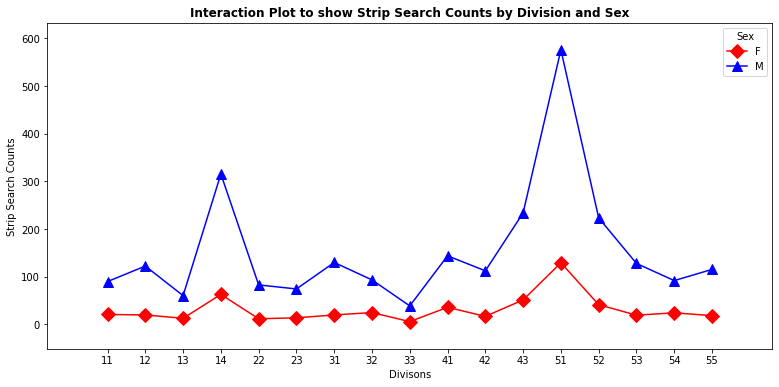

In [ ]:
Sex = df_anova['Sex']
StripNum = df_anova['StripNum'].values

fig, ax = plt.subplots(figsize=(13, 6))

# x axis (Perceived Race), trace (year), dependent variable (Cooperative mean value)
fig = interaction_plot(df_anova['ArrestLocDiv'], Sex, StripNum, colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Strip Search Counts')
plt.xlabel('Divisons')
plt.title('Interaction Plot to show Strip Search Counts by Division and Sex', fontweight='bold')
plt.show()

In [ ]:
'''from scipy.stats import f_oneway

grouped_data = melt_df_year.groupby(['ArrestLocDiv', 'Year'])['StripNum']

# Perform the two-way ANOVA
f_value, p_value = f_oneway(*[grouped_data.get_group(group) for group in grouped_data.groups])

# Print the F-value and p-value
print('F-value:', f_value)
print('p-value:', p_value)
'''

"from scipy.stats import f_oneway\n\ngrouped_data = melt_df_year.groupby(['ArrestLocDiv', 'Year'])['StripNum']\n\n# Perform the two-way ANOVA\nf_value, p_value = f_oneway(*[grouped_data.get_group(group) for group in grouped_data.groups])\n\n# Print the F-value and p-value\nprint('F-value:', f_value)\nprint('p-value:', p_value)\n"

In [ ]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from matplotlib.pyplot import figure

In [ ]:
pip install datascience

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


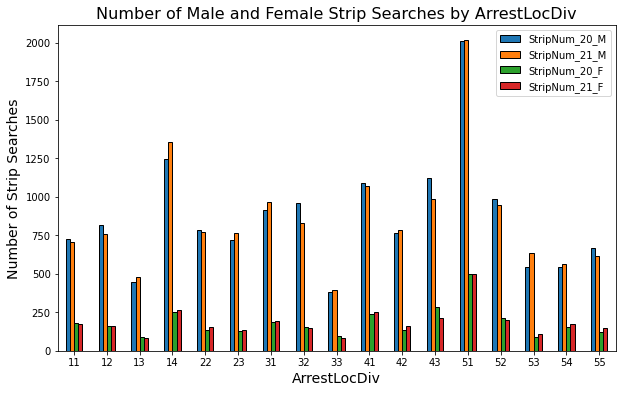

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe from the table
df = pd.DataFrame({
    'ArrestLocDiv': ['11', '12', '13', '14', '22', '23', '31', '32', '33', '41', '42', '43', '51', '52', '53', '54', '55'],
    'StripNum_20_M': [725, 819, 444, 1248, 786, 716, 916, 956, 381, 1086, 766, 1123, 2009, 983, 542, 541, 665],
    'StripNum_21_M': [709, 760, 482, 1354, 773, 764, 964, 829, 396, 1068, 781, 987, 2016, 945, 637, 566, 618],
    'StripNum_20_F': [183, 164, 89, 251, 135, 126, 190, 152, 93, 237, 135, 286, 500, 213, 91, 156, 121],
    'StripNum_21_F': [172, 159, 86, 264, 155, 132, 196, 151, 85, 249, 164, 211, 498, 199, 106, 174, 148]
})

# set the index of the dataframe to ArrestLocDiv
df = df.set_index('ArrestLocDiv')

# create the bar plot
ax = df.plot(kind='bar', rot=0, figsize=(10, 6))

# set the title and axis labels
ax.set_title('Number of Male and Female Strip Searches by ArrestLocDiv', fontsize=16)
ax.set_xlabel('ArrestLocDiv', fontsize=14)
ax.set_ylabel('Number of Strip Searches', fontsize=14)

# show the plot
plt.show()

#Part two


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [ ]:
df_year=df[['Arrest_Year',"Actions_at_arrest___Concealed_i","Actions_at_arrest___Combative__","Actions_at_arrest___Resisted__d","Actions_at_arrest___Mental_inst","Actions_at_arrest___Assaulted_o","Actions_at_arrest___Cooperative"]]
df_year=pd.melt(df_year,id_vars='Arrest_Year',var_name="Action_at_arrest",value_name="Frequency")
df_year=df_year.groupby(['Arrest_Year','Action_at_arrest']).sum().reset_index()
df_year.head()

,Arrest_Year,Action_at_arrest,Frequency
0,2020,Actions_at_arrest___Assaulted_o,206
1,2020,Actions_at_arrest___Combative__,1432
2,2020,Actions_at_arrest___Concealed_i,147
3,2020,Actions_at_arrest___Cooperative,14541
4,2020,Actions_at_arrest___Mental_inst,1108


[Text(0.5, 1.0, "Frequency for different years' actions at arrest by category")]

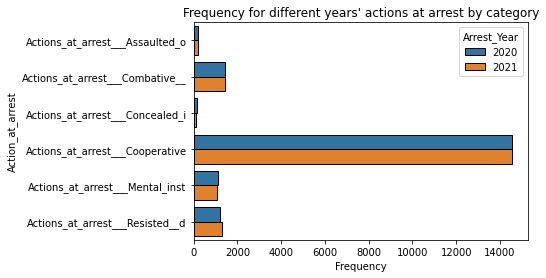

In [ ]:
sns.barplot(data=df_year, x="Frequency", y="Action_at_arrest",hue="Arrest_Year",ci=None).set(title='Frequency for different years\' actions at arrest by category')

In [ ]:
df_oc_t=df[['Occurrence_Category','Actions_at_arrest___Cooperative']]
df_oc_t=df_oc_t.groupby(['Occurrence_Category']).sum().reset_index()
df_oc_t.head(20)

,Occurrence_Category,Actions_at_arrest___Cooperative
0,Assault,3288
1,Assault & Other crimes against persons,3216
2,Break & Enter,385
3,Break and Enter,355
4,Crimes against Children,38
5,Drug Related,1218
6,"FTA/FTC, Compliance Check & Parollee",1858
7,FTA/FTC/Compliance Check/Parollee,1995
8,Fraud,216
9,Harassment & Threatening,595


In [ ]:
df_oc=df[['Occurrence_Category','Arrest_Month','Actions_at_arrest___Cooperative']]
df_oc=df_oc.groupby(['Occurrence_Category','Arrest_Month']).sum().reset_index()
df_oc.head(20)

,Occurrence_Category,Arrest_Month,Actions_at_arrest___Cooperative
0,Assault,Apr-June,810
1,Assault,Jan-Mar,721
2,Assault,July-Sept,890
3,Assault,Oct-Dec,867
4,Assault & Other crimes against persons,Apr-June,722
5,Assault & Other crimes against persons,Jan-Mar,832
6,Assault & Other crimes against persons,July-Sept,933
7,Assault & Other crimes against persons,Oct-Dec,729
8,Break & Enter,Apr-June,108
9,Break & Enter,Jan-Mar,89


[Text(0.5, 1.0, 'Frequency for cooperative action at arrest by occurrence category'),
 Text(0.5, 0, 'Actions_at_arrest___Cooperative Frequency')]

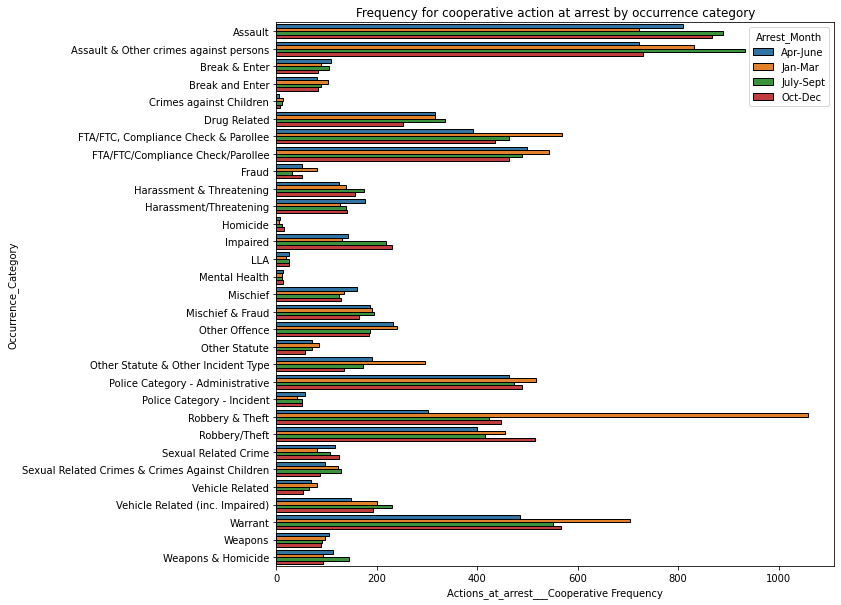

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_oc, x="Actions_at_arrest___Cooperative", y="Occurrence_Category",hue="Arrest_Month",ci=None).set(title='Frequency for cooperative action at arrest by occurrence category',xlabel="Actions_at_arrest___Cooperative Frequency")

In [ ]:
table = pd.pivot_table(df_oc, values='Actions_at_arrest___Cooperative', index=['Occurrence_Category'],columns=['Arrest_Month'], aggfunc=np.sum)
table.describe()


Arrest_Month,Apr-June,Jan-Mar,July-Sept,Oct-Dec
count,31.000000,31.000000,31.000000,31.000000
mean,214.967742,261.064516,237.387097,223.548387
std,205.410075,275.604540,239.584735,225.181236
min,6.000000,5.000000,11.000000,8.000000
25%,76.000000,82.500000,79.000000,70.500000
50%,143.000000,130.000000,145.000000,135.000000
75%,308.000000,385.000000,375.500000,343.500000
max,810.000000,1058.000000,933.000000,867.000000


In [ ]:
table.head()

Arrest_Month,Apr-June,Jan-Mar,July-Sept,Oct-Dec
Occurrence_Category,,,,
Assault,810,721,890,867
Assault & Other crimes against persons,722,832,933,729
Break & Enter,108,89,105,83
Break and Enter,81,103,88,83
Crimes against Children,6,13,11,8


In [ ]:
table1 = pd.pivot_table(df_oc, values='Actions_at_arrest___Cooperative', index=['Arrest_Month'],columns=['Occurrence_Category'], aggfunc=np.sum)
table1.describe()


Occurrence_Category,Assault,Assault & Other crimes against persons,Break & Enter,Break and Enter,Crimes against Children,Drug Related,"FTA/FTC, Compliance Check & Parollee",FTA/FTC/Compliance Check/Parollee,Fraud,Harassment & Threatening,...,Police Category - Incident,Robbery & Theft,Robbery/Theft,Sexual Related Crime,Sexual Related Crimes & Crimes Against Children,Vehicle Related,Vehicle Related (inc. Impaired),Warrant,Weapons,Weapons & Homicide
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,822.00000,804.000000,96.250000,88.750000,9.500000,304.500000,464.500000,498.750000,54.000000,148.750000,...,50.500000,557.75000,445.750000,107.000000,108.750000,66.250000,193.000000,576.500000,95.250000,110.250000
std,75.26398,99.622621,12.148388,9.945686,3.109126,36.373067,75.244047,33.230257,20.215506,21.608255,...,6.557439,339.65902,51.233941,18.672618,20.402206,11.146748,33.950945,91.994565,7.410578,25.011664
min,721.00000,722.000000,83.000000,81.000000,6.000000,252.000000,391.000000,463.000000,32.000000,125.000000,...,42.000000,301.00000,399.000000,81.000000,87.000000,53.000000,148.000000,485.000000,89.000000,92.000000
25%,787.75000,727.250000,87.500000,82.500000,7.500000,299.250000,424.000000,483.250000,46.250000,135.500000,...,48.750000,393.25000,411.000000,100.500000,93.750000,61.250000,181.750000,534.500000,89.750000,92.000000
50%,838.50000,780.500000,97.000000,85.500000,9.500000,315.000000,449.500000,494.500000,51.500000,147.500000,...,51.000000,436.00000,435.000000,111.500000,109.500000,66.000000,197.000000,558.500000,93.500000,102.000000
75%,872.75000,857.250000,105.750000,91.750000,11.500000,320.250000,490.000000,510.000000,59.250000,160.750000,...,52.750000,600.50000,469.750000,118.000000,124.500000,71.000000,208.250000,600.500000,99.000000,120.250000
max,890.00000,933.000000,108.000000,103.000000,13.000000,336.000000,568.000000,543.000000,81.000000,175.000000,...,58.000000,1058.00000,514.000000,124.000000,129.000000,80.000000,230.000000,704.000000,105.000000,145.000000


In [ ]:
treatment = df_oc[df_oc['Occurrence_Category'] == 'Assault']['Actions_at_arrest___Cooperative']
control = df_oc[df_oc['Occurrence_Category'] == 'FTA/FTC, Compliance Check & Parollee']['Actions_at_arrest___Cooperative']
t_statistic, p_value = stats.ttest_ind(treatment, control)

print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  6.71833062093
P-Value:  0.000528720953594


In [ ]:
model = ols('Actions_at_arrest___Cooperative ~ Occurrence_Category', data=df_oc).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)

                       df        sum_sq        mean_sq          F  \
Occurrence_Category  30.0  6.333764e+06  211125.458065  39.935053   
Residual             93.0  4.916650e+05    5286.720430        NaN   

                           PR(>F)  
Occurrence_Category  5.335009e-41  
Residual                      NaN  


In [ ]:
import statsmodels.stats.multicomp as mc
tukey = mc.pairwise_tukeyhsd(df_oc['Actions_at_arrest___Cooperative'], df_oc['Occurrence_Category'])
print(tukey.summary())

                                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                                            
                     group1                                          group2                     meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------------------------------------------------------------------------------
                                        Assault          Assault & Other crimes against persons    -18.0    0.9  -217.8395  181.8395  False
                                        Assault                                   Break & Enter  -725.75  0.001  -925.5895 -525.9105   True
                                        Assault                                 Break and Enter  -733.25  0.001  -933.0895 -533.4105   True
                                        Assault                         Crimes against Children   -812.5  0.001 -1012.3395 -612.6605   True
                    

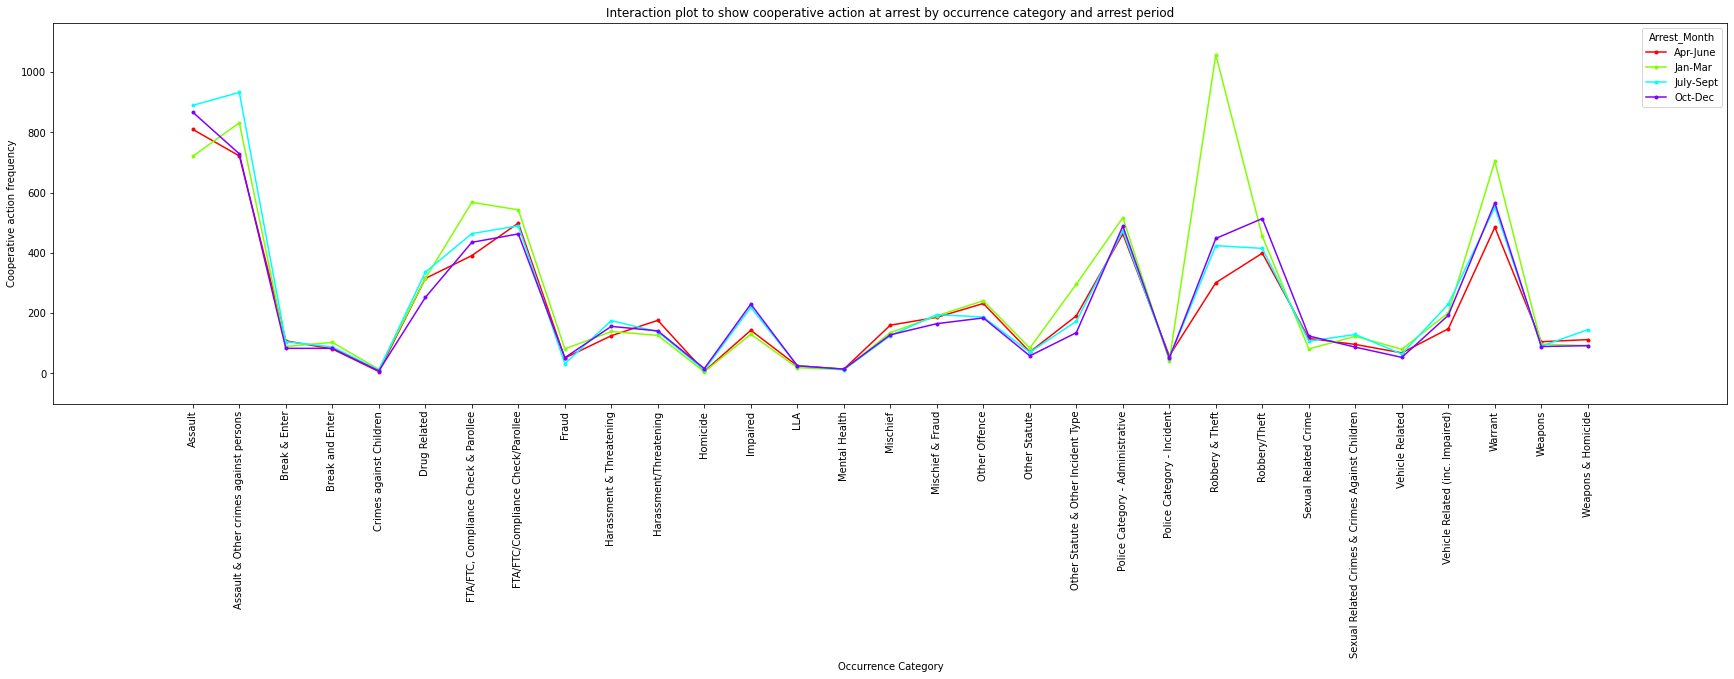

In [ ]:
Arrest_Month = df_oc['Arrest_Month']
frequency = df_oc['Actions_at_arrest___Cooperative'].values
fig, ax = plt.subplots(figsize=(30, 7))

# x axis (Perceived Race), trace (year), dependent variable (Cooperative mean value)
fig = interaction_plot(df_oc['Occurrence_Category'], Arrest_Month, frequency,ax=ax)
plt.ylabel('Cooperative action frequency')
plt.xlabel('Occurrence Category')
plt.xticks(rotation=90)
plt.title('Interaction plot to show cooperative action at arrest by occurrence category and arrest period')
plt.show()